In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.plotting import figure

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet,Lasso,Ridge
from sklearn.impute import SimpleImputer


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
train=pd.read_csv('Data_Train.csv')
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test=pd.read_csv('Test_set.csv')
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
sample=pd.read_csv('Sample_submission.csv')
sample

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [5]:
train.shape

(10683, 11)

In [6]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train.duplicated().sum()

220

In [8]:
train.drop_duplicates(inplace=True)

In [9]:
train.duplicated().sum()

0

In [10]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train[train['Route'].isna()]  # the null values are present in Route and total_stops on the same row

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,06/05/2019,Delhi,Cochin,NaN,9:45,07/05/2023 09:25,23h 40m,NaN,No info,7480


In [12]:
train.dropna(inplace=True)

In [13]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train.shape

(10462, 11)

# Combine the train + test
# Perform the preprocessing
# separate the preprocessed train. data
# Model on the preprocessed train data
# predict on the preprocessed test data

In [15]:
train['source']='train'
test['source']='test'

In [16]:
data=pd.concat([train,test])
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [17]:
data.shape

(13133, 12)

In [18]:
data.duplicated().sum()

26

In [19]:
data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

In [20]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [21]:
data['Arrival_Date']=pd.DatetimeIndex(data['Arrival_Time']).date

In [22]:
data['Arriv_time']=pd.DatetimeIndex(data['Arrival_Time']).time

In [23]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00


In [24]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13133, dtype: object

In [25]:
data['Duration'].apply(lambda x:x.split('m')[0])

0        2h 50
1        7h 25
2          19h
3        5h 25
4        4h 45
         ...  
2666    23h 55
2667     2h 35
2668     6h 35
2669    15h 15
2670    14h 20
Name: Duration, Length: 13133, dtype: object

In [26]:
data['Duration_in_mins']=data['Duration'].apply(lambda x:x.split('m')[0])

In [27]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,2h 50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00,7h 25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,19h
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00,5h 25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00,4h 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,23h 55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00,2h 35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,6h 35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00,15h 15


In [28]:
data['Duration_in_mins'].apply(lambda x:x.split(' ')[0])

0        2h
1        7h
2       19h
3        5h
4        4h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Duration_in_mins, Length: 13133, dtype: object

In [29]:
data['Duration_in_mins']=data['Duration_in_mins'].apply(lambda x:x.split(' ')[0])

In [30]:
data['Duration_in_mins'].apply(lambda x:x.split('h')[0])

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_in_mins, Length: 13133, dtype: object

In [31]:
data['Duration_in_mins']=data['Duration_in_mins'].apply(lambda x:x.split('h')[0])

In [32]:
data['Duration_in_mins'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [33]:
data['Duration_in_mins']=data['Duration_in_mins'].astype('int')

In [34]:
data['Duration_in_mins']

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_in_mins, Length: 13133, dtype: int32

In [35]:
data['Duration_in_mins'].apply(lambda x:x*60) ##converting the hrs into mins by multiplying 60 1hr=60mins

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration_in_mins, Length: 13133, dtype: int64

In [36]:
data['Duration_in_mins']=data['Duration_in_mins'].apply(lambda x:x*60)

In [37]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00,420
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00,300
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00,120
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00,900


In [38]:
data['Duration'].apply(lambda x:x.split('m')[0])

0        2h 50
1        7h 25
2          19h
3        5h 25
4        4h 45
         ...  
2666    23h 55
2667     2h 35
2668     6h 35
2669    15h 15
2670    14h 20
Name: Duration, Length: 13133, dtype: object

In [39]:
data['Duration_in_mins1']=data['Duration'].apply(lambda x:x.split('m')[0])

In [40]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,2h 50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00,420,7h 25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,19h
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00,300,5h 25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00,240,4h 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,23h 55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00,120,2h 35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,6h 35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00,900,15h 15


In [41]:
data['Duration_in_mins1'].apply(lambda x:x.split(' ')[-1])

0        50
1        25
2       19h
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration_in_mins1, Length: 13133, dtype: object

In [42]:
data['Duration_in_mins1']=data['Duration_in_mins1'].apply(lambda x:x.split(' ')[-1])

In [43]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00,420,25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,19h
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00,300,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00,120,35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00,900,15


In [44]:
data['Duration_in_mins1'].unique()

array(['50', '25', '19h', '45', '30', '5', '15', '35', '10', '23h', '20',
       '55', '22h', '12h', '3h', '5h', '40', '10h', '18h', '24h', '15h',
       '16h', '8h', '14h', '20h', '13h', '11h', '9h', '27h', '26h', '4h',
       '7h', '30h', '21h', '28h', '47h', '6h', '25h', '38h', '34h'],
      dtype=object)

In [45]:
data['Duration_in_mins1'].replace({'19h':'0','23h':'0','22h':'0', '12h':'0', '3h':'0', '5h':'0',
                                  '10h':'0', '18h':'0', '24h':'0', '15h':'0','16h':'0', '8h':'0', '14h':'0',
                                   '20h':'0', '13h':'0','11h':'0', '9h':'0', '27h':'0', '26h':'0', '4h':'0',
                                  '7h':'0', '30h':'0', '21h':'0', '28h':'0', '47h':'0', '6h':'0', '25h':'0', 
                                   '38h':'0', '34h':'0'})

0       50
1       25
2        0
3       25
4       45
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_in_mins1, Length: 13133, dtype: object

In [46]:
data['Duration_in_mins1']=data['Duration_in_mins1'].replace({'19h':'0','23h':'0','22h':'0', '12h':'0', '3h':'0', '5h':'0',
                                  '10h':'0', '18h':'0', '24h':'0', '15h':'0','16h':'0', '8h':'0', '14h':'0',
                                   '20h':'0', '13h':'0','11h':'0', '9h':'0', '27h':'0', '26h':'0', '4h':'0',
                                  '7h':'0', '30h':'0', '21h':'0', '28h':'0', '47h':'0', '6h':'0', '25h':'0', 
                                   '38h':'0', '34h':'0'})

In [47]:
data['Duration_in_mins1'].unique()

array(['50', '25', '0', '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [48]:
data[data['Duration_in_mins1']=='0']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0
18,Air India,12/06/2019,Delhi,Cochin,DEL ? CCU ? BOM ? COK,20:15,13/06/2023 19:15,23h,2 stops,No info,13381.0,train,2023-06-13,19:15:00,1380,0
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,16/06/2023 12:35,22h,2 stops,In-flight meal not included,10919.0,train,2023-06-16,12:35:00,1320,0
44,Multiple carriers,21/03/2019,Delhi,Cochin,DEL ? BOM ? COK,9:00,21:00,12h,1 stop,No info,13062.0,train,2023-09-19,21:00:00,720,0
53,IndiGo,18/06/2019,Banglore,Delhi,BLR ? DEL,21:15,19/06/2023 00:15,3h,non-stop,No info,3943.0,train,2023-06-19,00:15:00,180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Air India,27/03/2019,Delhi,Cochin,DEL ? COK,14:10,17:10,3h,non-stop,No info,NaN,test,2023-09-19,17:10:00,180,0
2598,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,19:00,11h,1 stop,No info,NaN,test,2023-09-19,19:00:00,660,0
2604,Multiple carriers,12/06/2019,Delhi,Cochin,DEL ? BOM ? COK,09:15,19:15,10h,1 stop,No info,NaN,test,2023-09-19,19:15:00,600,0
2607,Multiple carriers,3/03/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,NaN,test,2023-09-19,21:00:00,780,0


In [49]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00,420,25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00,300,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00,120,35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00,900,15


In [50]:
data['Duration_in_mins1'].astype('int')

0       50
1       25
2        0
3       25
4       45
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_in_mins1, Length: 13133, dtype: int32

In [51]:
data['Duration_in_mins1']=data['Duration_in_mins1'].astype('int')

In [52]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00,420,25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00,300,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00,120,35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00,900,15


In [53]:
data['Duration in mins']=data['Duration_in_mins1']+data['Duration_in_mins']

In [54]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1,Duration in mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50,170
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-19,13:15:00,420,25,445
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-19,23:30:00,300,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-19,21:35:00,240,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55,1435
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-19,16:55:00,120,35,155
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35,395
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-19,19:15:00,900,15,915


In [55]:
data.dtypes

Airline               object
Date_of_Journey       object
Source                object
Destination           object
Route                 object
Dep_Time              object
Arrival_Time          object
Duration              object
Total_Stops           object
Additional_Info       object
Price                float64
source                object
Arrival_Date          object
Arriv_time            object
Duration_in_mins       int64
Duration_in_mins1      int32
Duration in mins       int64
dtype: object

In [56]:
data=data.drop(columns=['Arrival_Time','Arrival_Date','Arriv_time','Duration_in_mins','Duration_in_mins1'])

In [57]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915


In [58]:
data['Dep_Time'].apply(lambda x:x.split(':')[0])

0       22
1        5
2        9
3       18
4       16
        ..
2666    20
2667    14
2668    21
2669    04
2670    04
Name: Dep_Time, Length: 13133, dtype: object

In [59]:
data['Dep_Time in hrs']=data['Dep_Time'].apply(lambda x:x.split(':')[0])

In [60]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04


In [61]:
data['Dep_Time'].apply(lambda x:x.split(':')[-1])

0       20
1       50
2       25
3       05
4       50
        ..
2666    30
2667    20
2668    50
2669    00
2670    55
Name: Dep_Time, Length: 13133, dtype: object

In [62]:
data['Dep_Time in mins']=data['Dep_Time'].apply(lambda x:x.split(':')[-1])

In [63]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00


In [64]:
data['Month_of_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).month

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2841924216.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Month_of_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).month


In [65]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20,3
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50,1
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20,3
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50,6
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00,6


In [66]:
data['Month_of_Journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [67]:
data['Month_of_Journey'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

0           March
1         January
2       September
3        December
4         January
          ...    
2666         June
2667        March
2668         June
2669         June
2670         June
Name: Month_of_Journey, Length: 13133, dtype: object

In [68]:
data['Month_of_Journey']=data['Month_of_Journey'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [69]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00,June


In [70]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
source                 0
Duration in mins       0
Dep_Time in hrs        0
Dep_Time in mins       0
Month_of_Journey       0
dtype: int64

In [71]:
data.duplicated().sum()

28

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13133 non-null  object 
 1   Date_of_Journey   13133 non-null  object 
 2   Source            13133 non-null  object 
 3   Destination       13133 non-null  object 
 4   Route             13133 non-null  object 
 5   Dep_Time          13133 non-null  object 
 6   Duration          13133 non-null  object 
 7   Total_Stops       13133 non-null  object 
 8   Additional_Info   13133 non-null  object 
 9   Price             10462 non-null  float64
 10  source            13133 non-null  object 
 11  Duration in mins  13133 non-null  int64  
 12  Dep_Time in hrs   13133 non-null  object 
 13  Dep_Time in mins  13133 non-null  object 
 14  Month_of_Journey  13133 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.6+ MB


In [73]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00,June


In [74]:
data['Route']==0

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Route, Length: 13133, dtype: bool

In [75]:
data['Route']==1

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Route, Length: 13133, dtype: bool

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13133 non-null  object 
 1   Date_of_Journey   13133 non-null  object 
 2   Source            13133 non-null  object 
 3   Destination       13133 non-null  object 
 4   Route             13133 non-null  object 
 5   Dep_Time          13133 non-null  object 
 6   Duration          13133 non-null  object 
 7   Total_Stops       13133 non-null  object 
 8   Additional_Info   13133 non-null  object 
 9   Price             10462 non-null  float64
 10  source            13133 non-null  object 
 11  Duration in mins  13133 non-null  int64  
 12  Dep_Time in hrs   13133 non-null  object 
 13  Dep_Time in mins  13133 non-null  object 
 14  Month_of_Journey  13133 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.6+ MB


In [77]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
source                 0
Duration in mins       0
Dep_Time in hrs        0
Dep_Time in mins       0
Month_of_Journey       0
dtype: int64

In [78]:
data['Total_Stops']==0

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Total_Stops, Length: 13133, dtype: bool

In [79]:
data['Total_Stops']==1

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Total_Stops, Length: 13133, dtype: bool

In [80]:
data.drop(columns=['Dep_Time'],inplace=True)

In [81]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897.0,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882.0,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302.0,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,23h 55m,1 stop,No info,NaN,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,NaN,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,6h 35m,1 stop,No info,NaN,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,15h 15m,1 stop,No info,NaN,test,915,04,00,June


In [82]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
source                 0
Duration in mins       0
Dep_Time in hrs        0
Dep_Time in mins       0
Month_of_Journey       0
dtype: int64

In [83]:
imp=SimpleImputer()

In [84]:
impute=imp.fit_transform(data[['Price']])

In [85]:
data['Price']=impute

In [86]:
data.drop(columns=['Duration'],inplace=True)

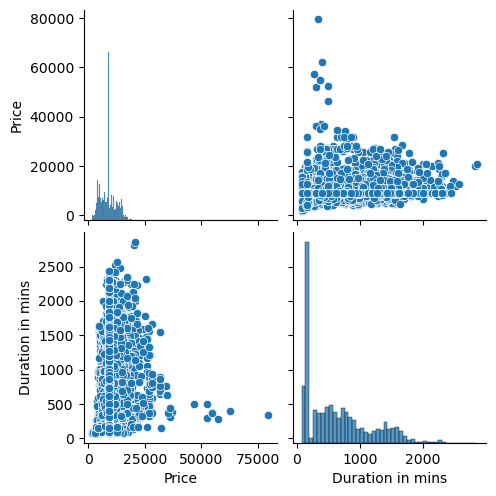

In [87]:
sns.pairplot(data)

In [88]:
data.corr()

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Duration in mins
Price,1.000000,0.447695
Duration in mins,0.447695,1.000000


C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

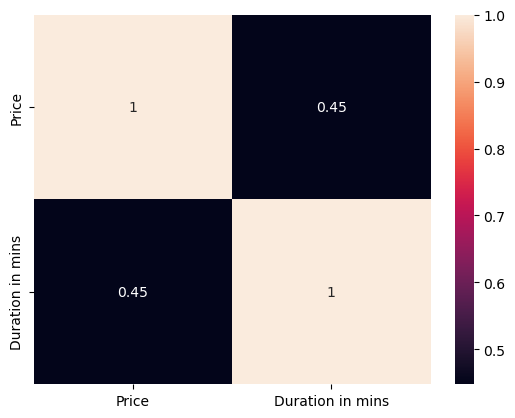

In [89]:
sns.heatmap(data.corr(),annot=True)

In [90]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,04,00,June


In [91]:
data['Dep_Time in hrs']

0       22
1        5
2        9
3       18
4       16
        ..
2666    20
2667    14
2668    21
2669    04
2670    04
Name: Dep_Time in hrs, Length: 13133, dtype: object

In [92]:
data['Dep_Time in hrs']=data['Dep_Time in hrs'].astype('int')

In [93]:
data['Dep_Time in hrs']

0       22
1        5
2        9
3       18
4       16
        ..
2666    20
2667    14
2668    21
2669     4
2670     4
Name: Dep_Time in hrs, Length: 13133, dtype: int32

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13133 non-null  object 
 1   Date_of_Journey   13133 non-null  object 
 2   Source            13133 non-null  object 
 3   Destination       13133 non-null  object 
 4   Route             13133 non-null  object 
 5   Total_Stops       13133 non-null  object 
 6   Additional_Info   13133 non-null  object 
 7   Price             13133 non-null  float64
 8   source            13133 non-null  object 
 9   Duration in mins  13133 non-null  int64  
 10  Dep_Time in hrs   13133 non-null  int32  
 11  Dep_Time in mins  13133 non-null  object 
 12  Month_of_Journey  13133 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 1.4+ MB


In [95]:
data['Dep_Time in hrs'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

In [96]:
data['Dep_Time in hrs'].replace({0:'0AM',1:'1AM',2:'2AM',3:'3AM',4:'4AM',5:'5AM',6:'6AM',7:'7AM',8:'8AM',9:'9AM',10:'10AM',11:'11AM'})

0        22
1       5AM
2       9AM
3        18
4        16
       ... 
2666     20
2667     14
2668     21
2669    4AM
2670    4AM
Name: Dep_Time in hrs, Length: 13133, dtype: object

In [97]:
data['Dep_Time in htclass']=data['Dep_Time in hrs'].replace({0:'0AM',1:'1AM',2:'2AM',3:'3AM',4:'4AM',5:'5AM',6:'6AM',7:'7AM',8:'8AM',9:'9AM',10:'10AM',11:'11AM'})

In [98]:
data['Dep_Time in htclass'].unique()

array([22, '5AM', '9AM', 18, 16, '8AM', '11AM', 20, 21, 17, 14, '4AM',
       '7AM', '10AM', 15, '6AM', 19, 23, 13, '2AM', 12, '0AM', '1AM',
       '3AM'], dtype=object)

In [99]:
data['Dep_Time in htclass'].replace({12:'12PM',13:'13PM',14:'14PM',15:'15PM',16:'16PM',17:'17PM',18:'18PM',19:'19PM',20:'20PM',21:'21PM',22:'22PM',23:'23PM'})

0       22PM
1        5AM
2        9AM
3       18PM
4       16PM
        ... 
2666    20PM
2667    14PM
2668    21PM
2669     4AM
2670     4AM
Name: Dep_Time in htclass, Length: 13133, dtype: object

In [100]:
data['Dep_Time in htclass']=data['Dep_Time in htclass'].replace({12:'12PM',13:'13PM',14:'14PM',15:'15PM',16:'16PM',17:'17PM',18:'18PM',19:'19PM',20:'20PM',21:'21PM',22:'22PM',23:'23PM'})

In [101]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey,Dep_Time in htclass
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,22,20,March,22PM
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,5,50,January,5AM
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,9,25,September,9AM
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,18,05,December,18PM
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,16,50,January,16PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,20,30,June,20PM
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,14,20,March,14PM
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,21,50,June,21PM
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,4,00,June,4AM


In [102]:
data['Dep_Time in htclass'].unique()

array(['22PM', '5AM', '9AM', '18PM', '16PM', '8AM', '11AM', '20PM',
       '21PM', '17PM', '14PM', '4AM', '7AM', '10AM', '15PM', '6AM',
       '19PM', '23PM', '13PM', '2AM', '12PM', '0AM', '1AM', '3AM'],
      dtype=object)

In [103]:
data['Dep_Time in htclass'].replace({'0AM':'midnight','1AM':'midnight','2AM':'midnight','3AM':'early morning','4AM':'early morning',
                              '5AM':'early morning','6AM':'early morning','7AM':'early morning','8AM':'late morning','9AM':'late morning',
                              '10AM':'late morning','11AM':'late morning','12PM':'afternoon','13PM':'afternoon','14PM':'afternoon',
                              '15PM':'afternoon','16PM':'evening','17PM':'evening','18PM':'evening','19PM':'night',
                               '20PM':'night','21PM':'night','22PM':'night','23PM':'night'})

0               night
1       early morning
2        late morning
3             evening
4             evening
            ...      
2666            night
2667        afternoon
2668            night
2669    early morning
2670    early morning
Name: Dep_Time in htclass, Length: 13133, dtype: object

In [104]:
data['Dep_Time in htclass']=data['Dep_Time in htclass'].replace({'0AM':'midnight','1AM':'midnight','2AM':'midnight','3AM':'early morning','4AM':'early morning',
                              '5AM':'early morning','6AM':'early morning','7AM':'early morning','8AM':'late morning','9AM':'late morning',
                              '10AM':'late morning','11AM':'late morning','12PM':'noon','13PM':'noon','14PM':'afternoon',
                              '15PM':'afternoon','16PM':'evening','17PM':'evening','18PM':'evening','19PM':'night',
                               '20PM':'night','21PM':'night','22PM':'night','23PM':'night'})

In [105]:
data['Dep_Time in htclass'].unique()

array(['night', 'early morning', 'late morning', 'evening', 'afternoon',
       'noon', 'midnight'], dtype=object)

In [106]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey,Dep_Time in htclass
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,22,20,March,night
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,5,50,January,early morning
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,9,25,September,late morning
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,18,05,December,evening
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,16,50,January,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,20,30,June,night
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,14,20,March,afternoon
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,21,50,June,night
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,4,00,June,early morning


In [107]:
data.drop(columns=['Dep_Time in hrs','Dep_Time in mins'],inplace=True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  object 
 1   Date_of_Journey      13133 non-null  object 
 2   Source               13133 non-null  object 
 3   Destination          13133 non-null  object 
 4   Route                13133 non-null  object 
 5   Total_Stops          13133 non-null  object 
 6   Additional_Info      13133 non-null  object 
 7   Price                13133 non-null  float64
 8   source               13133 non-null  object 
 9   Duration in mins     13133 non-null  int64  
 10  Month_of_Journey     13133 non-null  object 
 11  Dep_Time in htclass  13133 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ MB


In [109]:
data['Date_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).day

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2560904816.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).day


In [110]:
data['Date_Journey']

0       24
1        5
2        6
3        5
4        3
        ..
2666     6
2667    27
2668     3
2669     3
2670    15
Name: Date_Journey, Length: 13133, dtype: int64

In [111]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Date_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,24
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,27
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,3
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,3


In [112]:
data[['Date_of_Journey','Month_of_Journey','Date_Journey']]

,Date_of_Journey,Month_of_Journey,Date_Journey
0,24/03/2019,March,24
1,01/05/2019,January,5
2,09/06/2019,September,6
3,12/05/2019,December,5
4,01/03/2019,January,3
...,...,...,...
2666,6/06/2019,June,6
2667,27/03/2019,March,27
2668,6/03/2019,June,3
2669,6/03/2019,June,3


In [113]:
data[['Month_of_Journey','Date_Journey']]

,Month_of_Journey,Date_Journey
0,March,24
1,January,5
2,September,6
3,December,5
4,January,3
...,...,...
2666,June,6
2667,March,27
2668,June,3
2669,June,3


In [114]:
import datetime as date

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  object 
 1   Date_of_Journey      13133 non-null  object 
 2   Source               13133 non-null  object 
 3   Destination          13133 non-null  object 
 4   Route                13133 non-null  object 
 5   Total_Stops          13133 non-null  object 
 6   Additional_Info      13133 non-null  object 
 7   Price                13133 non-null  float64
 8   source               13133 non-null  object 
 9   Duration in mins     13133 non-null  int64  
 10  Month_of_Journey     13133 non-null  object 
 11  Dep_Time in htclass  13133 non-null  object 
 12  Date_Journey         13133 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.4+ MB


In [116]:
pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\1057304681.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek


Int64Index([6, 5, 4, 3, 3, 0, 1, 3, 1, 0,
            ...
            2, 1, 3, 5, 4, 3, 2, 0, 0, 5],
           dtype='int64', name='Date_of_Journey', length=13133)

In [117]:
data['Day_of_Journey']=pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2980857057.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Day_of_Journey']=pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek


In [118]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Date_Journey,Day_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,24,6
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,5,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,6,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,5,3
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,6,3
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,27,2
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,3,0
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,3,0


In [119]:
data[['Date_of_Journey','Month_of_Journey','Date_Journey','Day_of_Journey']]

,Date_of_Journey,Month_of_Journey,Date_Journey,Day_of_Journey
0,24/03/2019,March,24,6
1,01/05/2019,January,5,5
2,09/06/2019,September,6,4
3,12/05/2019,December,5,3
4,01/03/2019,January,3,3
...,...,...,...,...
2666,6/06/2019,June,6,3
2667,27/03/2019,March,27,2
2668,6/03/2019,June,3,0
2669,6/03/2019,June,3,0


In [120]:
data['Day_of_Journey'].unique()

array([6, 5, 4, 3, 0, 1, 2], dtype=int64)

In [121]:
data['Day_of_Journey'].replace({6:'Sunday',5:'Saturday',4:'Friday',3:'Thursday',2:'Wednesday',1:'Tuesday',0:'Monday'})

0          Sunday
1        Saturday
2          Friday
3        Thursday
4        Thursday
          ...    
2666     Thursday
2667    Wednesday
2668       Monday
2669       Monday
2670     Saturday
Name: Day_of_Journey, Length: 13133, dtype: object

In [122]:
data['Day_of_Journey']=data['Day_of_Journey'].replace({6:'Sunday',5:'Saturday',4:'Friday',3:'Thursday',2:'Wednesday',1:'Tuesday',0:'Monday'})

In [123]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Date_Journey,Day_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,24,Sunday
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,5,Saturday
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,6,Friday
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,5,Thursday
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,6,Thursday
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,27,Wednesday
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,3,Monday
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,3,Monday


In [124]:
data.drop(columns=['Date_Journey'],inplace=True)

In [125]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,Sunday
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,Saturday
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,Friday
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,Thursday
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,Thursday
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,Wednesday
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,Monday
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,Monday


In [126]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [127]:
data['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

0       0
1       2
2       2
3       1
4       1
       ..
2666    1
2667    0
2668    1
2669    1
2670    1
Name: Total_Stops, Length: 13133, dtype: int64

In [128]:
data['Totalno_Stops']=data['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [129]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey,Totalno_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,Sunday,0
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,Saturday,2
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,Friday,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,Thursday,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,Thursday,1
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,Wednesday,0
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,Monday,1
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,Monday,1


In [130]:
data.drop(columns=['Total_Stops'],inplace=True)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  object 
 1   Date_of_Journey      13133 non-null  object 
 2   Source               13133 non-null  object 
 3   Destination          13133 non-null  object 
 4   Route                13133 non-null  object 
 5   Additional_Info      13133 non-null  object 
 6   Price                13133 non-null  float64
 7   source               13133 non-null  object 
 8   Duration in mins     13133 non-null  int64  
 9   Month_of_Journey     13133 non-null  object 
 10  Dep_Time in htclass  13133 non-null  object 
 11  Day_of_Journey       13133 non-null  object 
 12  Totalno_Stops        13133 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.4+ MB


In [132]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [133]:
data[data['Airline']=='Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey,Totalno_Stops
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,No info,52229.000000,train,300,January,early morning,Thursday,1
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Business class,79512.000000,train,340,January,early morning,Thursday,1
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Business class,62427.000000,train,400,January,early morning,Thursday,1
7351,Jet Airways Business,03/03/2019,Delhi,Cochin,DEL ? ATQ ? BOM ? COK,No info,46490.000000,train,500,March,night,Sunday,2
9715,Jet Airways Business,06/03/2019,Delhi,Cochin,DEL ? ATQ ? BOM ? COK,No info,52285.000000,train,500,June,night,Monday,2
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? MAA ? DEL,Business class,57209.000000,train,280,January,late morning,Thursday,1
1802,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Business class,9026.790289,test,450,January,early morning,Thursday,1
1819,Jet Airways Business,03/03/2019,Banglore,New Delhi,BLR ? DEL,No info,9026.790289,test,160,March,night,Sunday,0


In [134]:
data['Airline'].replace({'Jet Airways Business': 'Jet Airways'})

0                  IndiGo
1               Air India
2             Jet Airways
3                  IndiGo
4                  IndiGo
              ...        
2666            Air India
2667               IndiGo
2668          Jet Airways
2669            Air India
2670    Multiple carriers
Name: Airline, Length: 13133, dtype: object

In [135]:
data['Airline']=data['Airline'].replace({'Jet Airways Business': 'Jet Airways'})

In [136]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

In [ ]:
data

# Preprocessing

In [137]:
data.select_dtypes(exclude=np.number).drop(columns=['source','Date_of_Journey','Route'])

,Airline,Source,Destination,Additional_Info,Month_of_Journey,Dep_Time in htclass,Day_of_Journey
0,IndiGo,Banglore,New Delhi,No info,March,night,Sunday
1,Air India,Kolkata,Banglore,No info,January,early morning,Saturday
2,Jet Airways,Delhi,Cochin,No info,September,late morning,Friday
3,IndiGo,Kolkata,Banglore,No info,December,evening,Thursday
4,IndiGo,Banglore,New Delhi,No info,January,evening,Thursday
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,June,night,Thursday
2667,IndiGo,Kolkata,Banglore,No info,March,afternoon,Wednesday
2668,Jet Airways,Delhi,Cochin,No info,June,night,Monday
2669,Air India,Delhi,Cochin,No info,June,early morning,Monday


In [138]:
cat_col=data.select_dtypes(exclude=np.number).drop(columns=['Date_of_Journey','Route','source'])

In [139]:
encoded_cat=pd.get_dummies(cat_col)

In [140]:
encoded_cat

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Dep_Time in htclass_midnight,Dep_Time in htclass_night,Dep_Time in htclass_noon,Day_of_Journey_Friday,Day_of_Journey_Monday,Day_of_Journey_Saturday,Day_of_Journey_Sunday,Day_of_Journey_Thursday,Day_of_Journey_Tuesday,Day_of_Journey_Wednesday
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2667,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2668,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2669,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [141]:
data.select_dtypes(include=np.number)

,Price,Duration in mins,Totalno_Stops
0,3897.000000,170,0
1,7662.000000,445,2
2,13882.000000,1140,2
3,6218.000000,325,1
4,13302.000000,285,1
...,...,...,...
2666,9026.790289,1435,1
2667,9026.790289,155,0
2668,9026.790289,395,1
2669,9026.790289,915,1


In [142]:
num_data=data.select_dtypes(include=np.number)

In [143]:
encoded_cat=encoded_cat.reset_index().drop(columns='index')
num_data=num_data.reset_index().drop(columns='index')

In [144]:
ident_source=data[['source']].reset_index().drop(columns='index')

In [145]:
data_preprocessed=pd.concat([encoded_cat,num_data,ident_source],axis=1)

In [146]:
train_preprocessed=data_preprocessed[data_preprocessed['source']=='train']

In [147]:
train_preprocessed

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Day_of_Journey_Monday,Day_of_Journey_Saturday,Day_of_Journey_Sunday,Day_of_Journey_Thursday,Day_of_Journey_Tuesday,Day_of_Journey_Wednesday,Price,Duration in mins,Totalno_Stops,source
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,3897.0,170,0,train
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,7662.0,445,2,train
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,13882.0,1140,2,train
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,6218.0,325,1,train
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,13302.0,285,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4107.0,150,0,train
10458,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4145.0,155,0,train
10459,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,7229.0,180,0,train
10460,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,12648.0,160,0,train


In [148]:
train_preprocessed.drop(columns='source',inplace=True)

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2303680683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_preprocessed.drop(columns='source',inplace=True)


In [149]:
test_preprocessed=data_preprocessed[data_preprocessed['source']=='test']

In [150]:
test_preprocessed

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Day_of_Journey_Monday,Day_of_Journey_Saturday,Day_of_Journey_Sunday,Day_of_Journey_Thursday,Day_of_Journey_Tuesday,Day_of_Journey_Wednesday,Price,Duration in mins,Totalno_Stops,source
10462,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,9026.790289,655,1,test
10463,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,9026.790289,240,1,test
10464,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,9026.790289,1425,1,test
10465,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,9026.790289,780,1,test
10466,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,9026.790289,170,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,9026.790289,1435,1,test
13129,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,9026.790289,155,0,test
13130,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,9026.790289,395,1,test
13131,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,9026.790289,915,1,test


In [151]:
test_preprocessed.drop(columns=['Duration in mins','Totalno_Stops','source'],inplace=True)

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\619419263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprocessed.drop(columns=['Duration in mins','Totalno_Stops','source'],inplace=True)


In [152]:
train_preprocessed.to_csv('train_preprocessed.csv',index='False')
test_preprocessed.to_csv('test_preprocessed.csv',index='False')

# first error:0.76749

# Modelling by using linear regression and multiple linear regression

In [153]:
[variance_inflation_factor(data[['Duration in mins','Price','Totalno_Stops']].values, i) for i in range(data[['Duration in mins','Price','Totalno_Stops']].shape[1])]

[5.460766127183598, 3.848543804146986, 5.972712619207302]

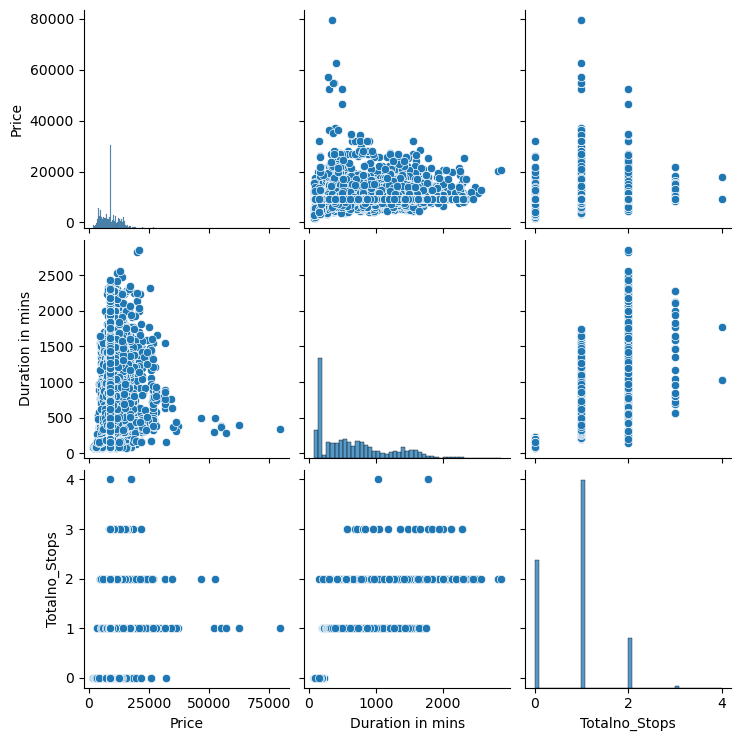

In [154]:
sns.pairplot(data)

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

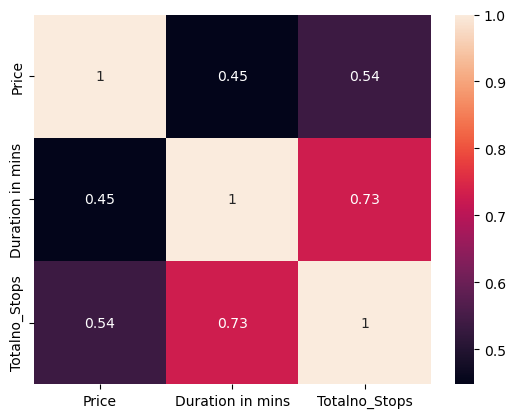

In [155]:
sns.heatmap(data.corr(),annot=True)

In [156]:
data.corr()

C:\Users\radia\AppData\Local\Temp\ipykernel_7036\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Duration in mins,Totalno_Stops
Price,1.000000,0.447695,0.535295
Duration in mins,0.447695,1.000000,0.729109
Totalno_Stops,0.535295,0.729109,1.000000


In [157]:
X = train_preprocessed.drop(columns=['Price'])

In [158]:
y = train_preprocessed['Price']

In [159]:
model=LinearRegression()

In [160]:
model.fit(X,y)

LinearRegression()

In [161]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=2)

In [162]:
train_X.shape, test_X.shape

((7323, 55), (3139, 55))

In [163]:
train_X

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Dep_Time in htclass_noon,Day_of_Journey_Friday,Day_of_Journey_Monday,Day_of_Journey_Saturday,Day_of_Journey_Sunday,Day_of_Journey_Thursday,Day_of_Journey_Tuesday,Day_of_Journey_Wednesday,Duration in mins,Totalno_Stops
4250,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,610,1
8956,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,165,0
1058,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,155,0
2444,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,870,1
9574,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,330,1
2514,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,160,0
6637,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,875,2
2575,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1280,1


In [164]:
test_X

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Dep_Time in htclass_noon,Day_of_Journey_Friday,Day_of_Journey_Monday,Day_of_Journey_Saturday,Day_of_Journey_Sunday,Day_of_Journey_Thursday,Day_of_Journey_Tuesday,Day_of_Journey_Wednesday,Duration in mins,Totalno_Stops
3738,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,710,1
8145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,150,0
7043,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,175,0
3914,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1610,1
1667,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,590,1
202,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,195,0
4206,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,590,2
7058,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,920,1


# Modelling part Duration vs Time

<Axes: xlabel='Duration in mins', ylabel='Price'>

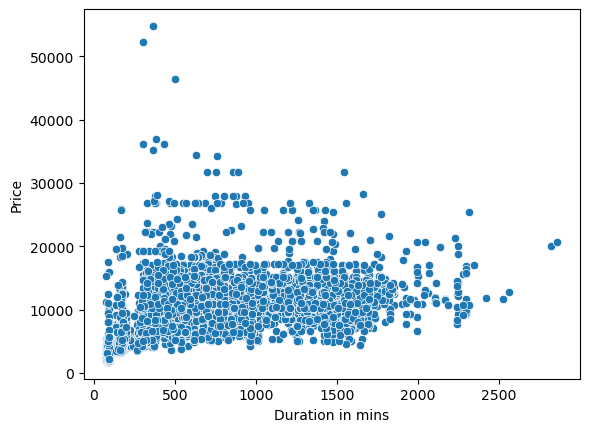

In [165]:
sns.scatterplot(x=train_X['Duration in mins'],y=train_y)  ##  the residualvariance should be homoscadacity

<Axes: xlabel='Duration in mins', ylabel='Price'>

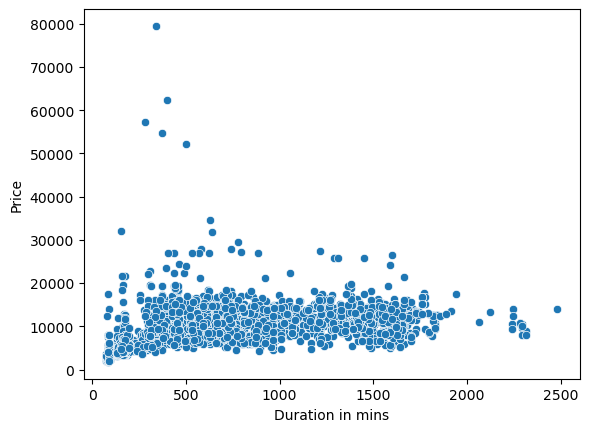

In [166]:
sns.scatterplot(x=test_X['Duration in mins'],y=test_y)

In [167]:
reg=LinearRegression()

In [168]:
reg.fit(train_X,train_y)

LinearRegression()

In [169]:
reg.intercept_

-9533494604006.494

In [170]:
reg.coef_

array([ 9.53349461e+12,  9.53349461e+12,  9.53349461e+12,  9.53349461e+12,
        9.53349462e+12,  9.53349462e+12,  9.53349462e+12,  9.53349461e+12,
       -7.79785156e-01,  9.53349461e+12,  9.53349462e+12,  5.24750732e+02,
        7.68942871e+01,  9.65894775e+01,  6.17988281e+01, -7.54708252e+02,
        5.64038086e+01,  9.41195068e+01, -1.39821045e+03, -7.53408203e+02,
        7.54537354e+01,  1.92294702e+03,  3.84544485e+03,  8.53517971e+03,
       -2.92968750e-03,  8.30659325e+03,  2.37897270e+02, -7.25082690e+03,
       -6.05075440e+03, -3.77628601e+03, -3.45922559e+03, -3.87979187e+02,
       -5.33462158e+02, -1.95087891e+01,  7.76498413e+02,  9.85100098e+01,
       -7.51876709e+02,  2.41675781e+02,  1.87916794e+02,  1.69822266e+02,
       -3.02528076e+02,  3.15639404e+02,  8.31542969e+00,  4.51340332e+01,
       -6.54404297e+01, -1.71598145e+02, -6.56906616e+02,  4.92591553e+02,
       -4.21774780e+02,  9.63349365e+02,  1.23555969e+02, -7.29759521e+01,
       -4.28344238e+02,  

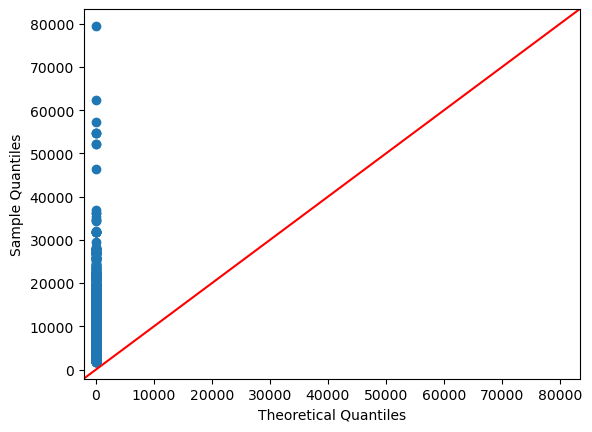

In [171]:
##QQ PLOT
sm.qqplot(data['Price'], line='45')
plt.show()

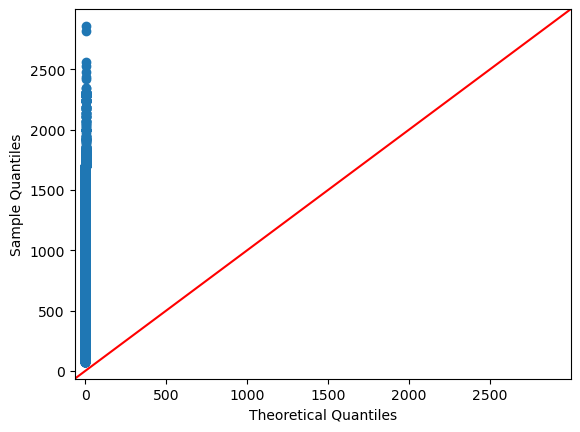

In [172]:
##QQ plot
sm.qqplot(data['Duration in mins'], line='45')
plt.show()

<Axes: ylabel='Density'>

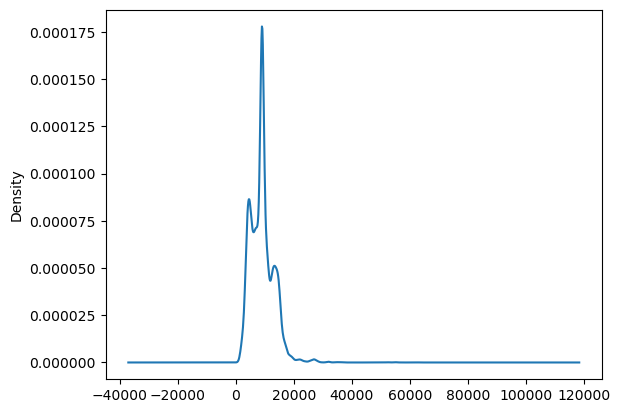

In [173]:
##the residual should be normally distributed
data['Price'].plot(kind='kde')

<Axes: ylabel='Density'>

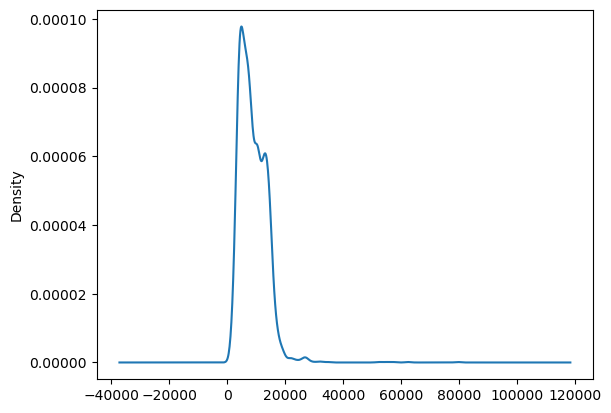

In [174]:
test_y.plot(kind='kde')

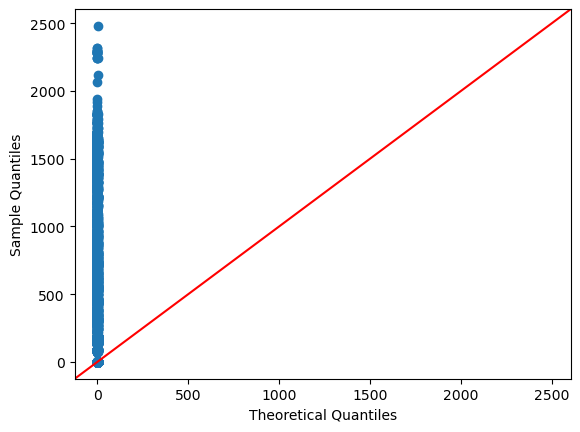

In [175]:
sm.qqplot(test_X, line='45')
plt.show()

# ERROR METRICS

In [176]:
reg.fit(train_X[['Duration in mins']], train_y)

LinearRegression()

In [177]:
reg.intercept_

6095.300814679262

In [178]:
reg.coef_

array([4.73149895])

In [179]:
train_predict = reg.predict(train_X[['Duration in mins']])

In [180]:
train_predict

array([ 8981.51517171,  6875.99814076,  6828.6831513 , ...,
       10235.36239239, 12151.61946551, 14138.84902281])

Text(0, 0.5, 'Price')

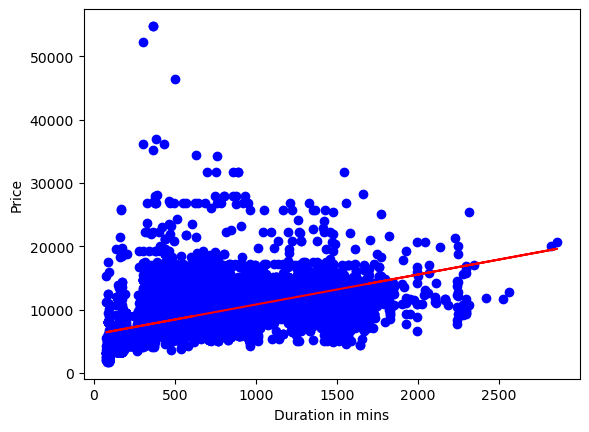

In [181]:
plt.scatter(train_X['Duration in mins'], train_y, color = 'blue')
plt.plot(train_X['Duration in mins'], reg.predict(train_X[['Duration in mins']]), color = 'red')
plt.xlabel('Duration in mins')
plt.ylabel('Price')

In [182]:
test_predict = reg.predict(test_X[['Duration in mins']])

In [183]:
test_predict

array([ 9454.66506631,  6805.02565657,  6923.31313022, ...,
        8886.8851928 , 10448.27984496,  7609.38047739])

Text(0, 0.5, 'Price')

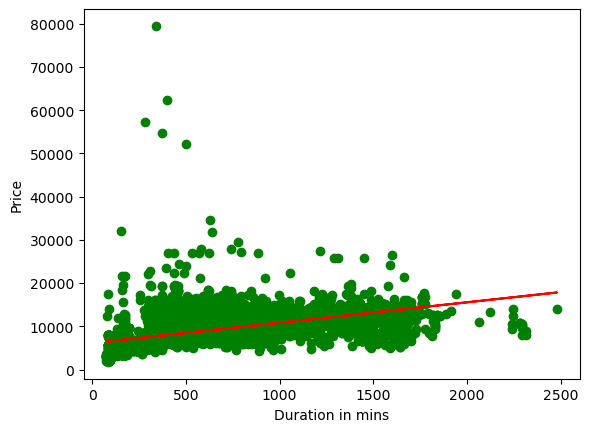

In [184]:
plt.scatter(test_X['Duration in mins'], test_y, color = 'green')
plt.plot(test_X['Duration in mins'], reg.predict(test_X[['Duration in mins']]), color = 'red')
plt.xlabel('Duration in mins')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

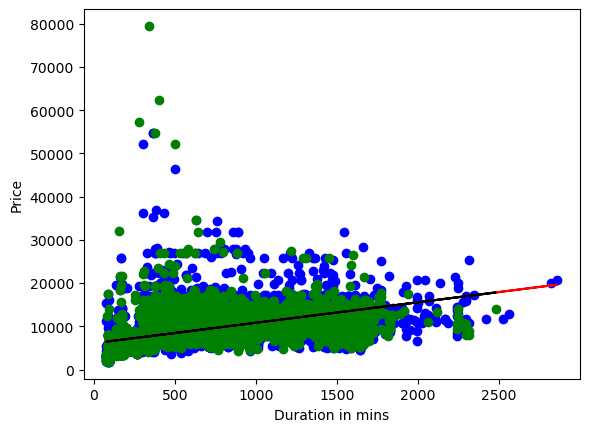

In [185]:
plt.scatter(train_X['Duration in mins'], train_y, color = 'blue')
plt.scatter(test_X['Duration in mins'], test_y, color = 'green')
plt.plot(train_X['Duration in mins'], reg.predict(train_X[['Duration in mins']]), color = 'red')
plt.plot(test_X['Duration in mins'], reg.predict(test_X[['Duration in mins']]), color = 'black')
plt.xlabel('Duration in mins')
plt.ylabel('Price')

In [186]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [187]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_X[['Duration in mins']]))

TRAIN ERROR
MSE =  15083969.195803287
RMSE =  3883.808594125525
MAE =  2854.097613945606
MAPE =  0.3805816154145416
R2 Score =  0.2699431704479518


In [188]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_X[['Duration in mins']]))

TEST ERROR
MSE =  18152236.166966658
RMSE =  4260.544116303299
MAE =  2898.514071160972
MAPE =  0.3970071996283681
R2 Score =  0.2130552691380717


In [189]:
test_predict=sample['Price']

In [190]:
sample['Price']

0       15998
1       16612
2       25572
3       25778
4       16934
        ...  
2666    14046
2667    14086
2668    22720
2669    23544
2670    27489
Name: Price, Length: 2671, dtype: int64

In [191]:
sample['Price'] = abs(sample['Price'])

<Axes: ylabel='Frequency'>

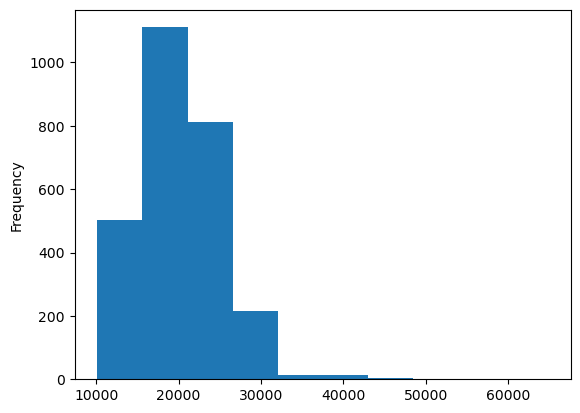

In [192]:
sample['Price'].plot(kind='hist')   ##right skewed histogram

In [193]:
sample.to_csv('LR_All_Columns.csv', index = False)

# Second error output: 0.54022

In [194]:
train_predict

array([ 8981.51517171,  6875.99814076,  6828.6831513 , ...,
       10235.36239239, 12151.61946551, 14138.84902281])

In [195]:
train_X.shape,test_X.shape

((7323, 55), (3139, 55))

In [196]:
train_y.shape, test_y.shape

((7323,), (3139,))

<Axes: >

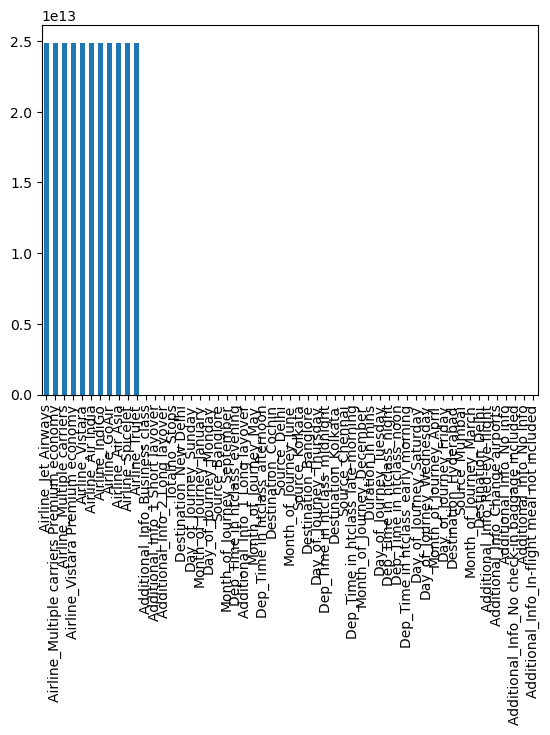

In [197]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')